In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
#from google.colab import files
#df = files.upload()   #If it is for the first time use this enabled to lead from drive
df = pd.read_csv("Anemia_clinical_records_dataset_new_featureSelected.csv")
df.head() ##this returns the first five rows of the dataset

,Sno.,age,region,recidence,ANC visit,EducLevel,waterSrc,toiletType,houseHoldMemb,freqRnewsPpr,...,currBfeeding,BMI,mosquitoNet,addiction,h_ocup,occup,delivery_Place,vaccination,wealthIndex,Anemia
0,1,4,5,1,1,0,1,1,1,0,...,0,1,0,0,3,0,0,0,3,4
1,2,4,5,1,1,0,1,1,1,0,...,0,1,0,0,3,0,0,0,3,4
2,3,2,6,2,1,1,0,0,1,0,...,0,1,0,1,5,0,0,0,1,4
3,4,2,6,2,1,1,0,0,1,0,...,0,1,0,1,5,0,0,0,1,4
4,5,2,6,2,1,1,0,0,1,0,...,0,1,0,1,5,0,0,1,1,4


In [27]:
df.shape ##returns the no. of rows and columns
df.dtypes  #datatype f each columns
df.describe
df.isnull().sum() ##check for null valued columns
df.duplicated().any() ##check for duplicate values

False

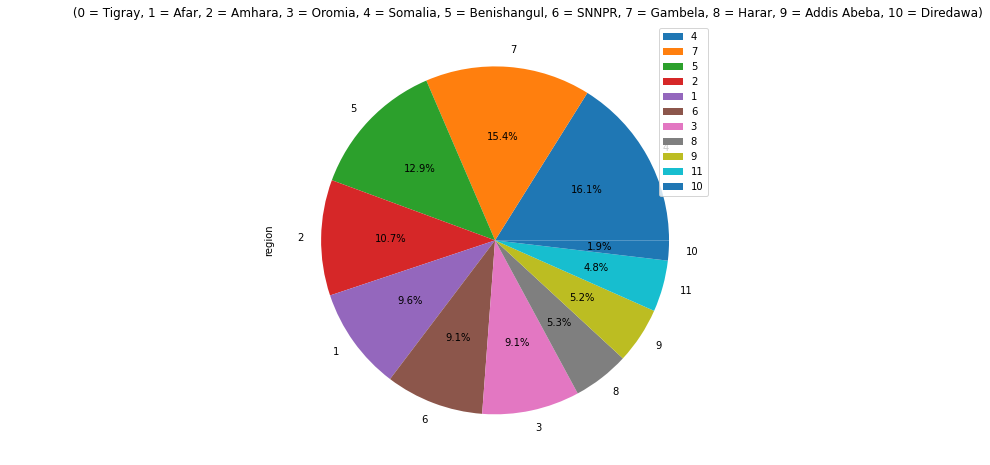

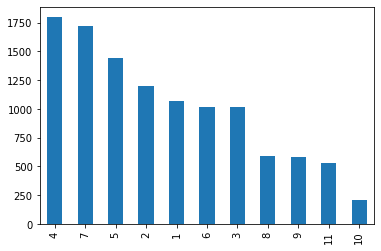

In [28]:
plt.figure(1, figsize=(20,8))
df['region'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('                 (0 = Tigray, 1 = Afar, 2 = Amhara, 3 = Oromia, 4 = Somalia, 5 = Benishangul, 6 = SNNPR, 7 = Gambela, 8 = Harar, 9 = Addis Abeba, 10 = Diredawa)')
plt.legend()
plt.show()

df['region'].value_counts().plot(kind='bar')
plt.show()


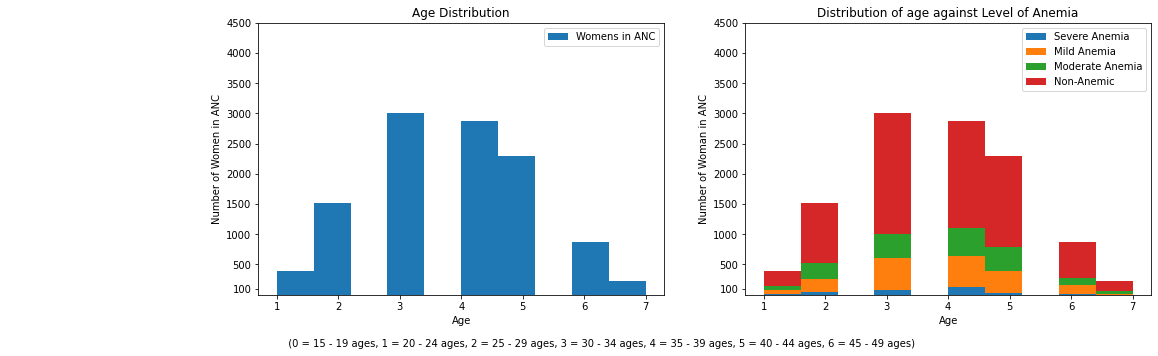

In [29]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].hist(df['age'],label = 'Womens in ANC')
ax[0].set_xlabel('Age\n\n                                                                                          (0 = 15 - 19 ages, 1 = 20 - 24 ages, 2 = 25 - 29 ages, 3 = 30 - 34 ages, 4 = 35 - 39 ages, 5 = 40 - 44 ages, 6 = 45 - 49 ages)')
ax[0].set_ylabel('Number of Women in ANC')
ax[0].set_yticks([100,500,1000,1500,2000,2500,3000,3500,4000,4500])
ax[0].legend()
ax[0].set_title('Age Distribution')
ax[1].hist(x = [df[df['Anemia']==1]['age'],df[df['Anemia']==2]['age'],df[df['Anemia']==3]['age'],df[df['Anemia']==4]['age']],stacked=True,label=['Severe Anemia','Mild Anemia','Moderate Anemia','Non-Anemic'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Woman in ANC')
ax[1].set_yticks([100,500,1000,1500,2000,2500,3000,3500,4000,4500])
ax[1].set_title('Distribution of age against Level of Anemia')
ax[1].legend()

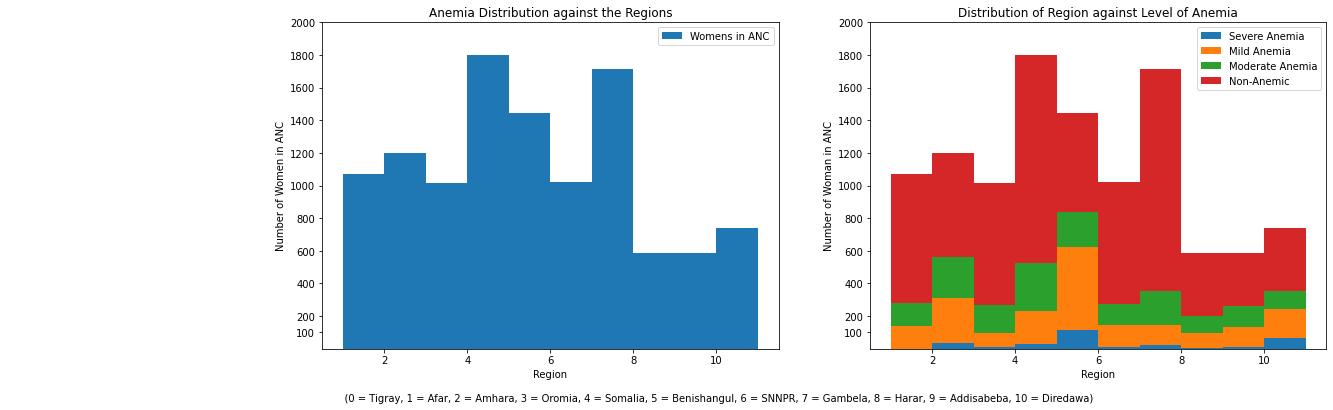

In [30]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].hist(df['region'],label = 'Womens in ANC')
ax[0].set_xlabel('Region\n\n                                                                                                            (0 = Tigray, 1 = Afar, 2 = Amhara, 3 = Oromia, 4 = Somalia, 5 = Benishangul, 6 = SNNPR, 7 = Gambela, 8 = Harar, 9 = Addisabeba, 10 = Diredawa)')
ax[0].set_ylabel('Number of Women in ANC')
ax[0].set_yticks([100,200,400,600,800,1000,1200,1400,1600,1800,2000])
ax[0].legend()
ax[0].set_title('Anemia Distribution against the Regions')
ax[1].hist(x = [df[df['Anemia']==1]['region'],df[df['Anemia']==2]['region'],df[df['Anemia']==3]['region'],df[df['Anemia']==4]['region']],stacked=True,label=['Severe Anemia','Mild Anemia','Moderate Anemia','Non-Anemic'])
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Number of Woman in ANC')
ax[1].set_yticks([100,200,400,600,800,1000,1200,1400,1600,1800,2000])
ax[1].set_title('Distribution of Region against Level of Anemia')
ax[1].legend()

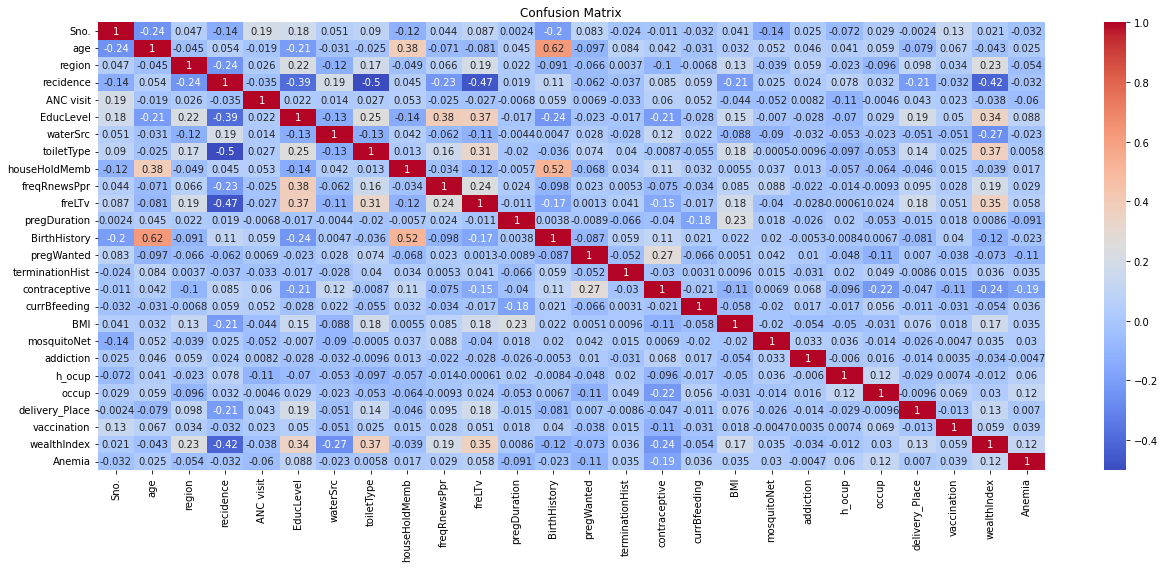

In [31]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.show()


In [32]:
# Feature Selection with Univariate Statistical Tests
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
#df = pd.read_csv("Anemia_clinical_records_dataset.csv")   #This is if the feature is not extracted only. But we allready extracted
#names = ['id','age','region','recidence', 'ANC visit','EducLevel','waterSrc','toiletType','religion','houseHoldMemb','freqRnewsPpr','freqLRadio','freLTv','pregDuration','BirthHistory','pregWanted','terminationHist','contraceptive','currBfeeding','BMI','Anemia','mosquitoNet','addiction','marital','h_educ','h_ocup','occup','delivery_Place','ironTab','malariaTab','vaccination','diarrhea','vitA','wealthIndex]
#dataframe = read_csv(df, names=names)
array = df.values
X = array[:,0:25]   #Since we've 34 different attribute it means 0-33 , I eliminate the Sno. column for selection, 1-33
Y = array[:,25]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[  3.936   4.174  19.819   8.165  13.616  29.588  11.711   1.47    1.953
   5.833  15.987  32.117   5.592  48.059   7.874 145.259  10.675   5.249
   6.627   0.343  13.765  56.618   0.434   5.584  52.256]


Following code will help you in **finding top K features with their F-scores**. Let, X is the pandas dataframe, whose columns are all the features and Y is the list of class labels. **NOTE** You can change the number of feature you want for your ML changing the values of **k**. For this example we have used k=15.

In [33]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 21 features with top 21 scores ##NOTE You can change the number of feature you want for your ML using k=
selector = SelectKBest(f_classif, k = 24)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
array = df.values
X = array[:,0:25]   #Since we've 34 different attribute it means 0-33 , we eliminate the Sno column later
Y = array[:,25]     #This Y is target output required(the outputs for all the 234 rows, datasets).
X_new = selector.fit_transform(X, Y)
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(df.loc[:, df.columns != 'Sno.'], scores))   #df.loc[:, df.columns != 'Sno.'] eliminating Sno column
ns_df = pd.DataFrame(data = names_scores, columns=['Feature_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])
print(ns_df_sorted)


      Feature_names    F_Scores
15     currBfeeding  145.258713
20            occup   56.618201
23      wealthIndex   52.255864
13  terminationHist   48.059204
11     BirthHistory   32.116532
5          waterSrc   29.588025
2         recidence   19.819270
10     pregDuration   15.987105
19           h_ocup   13.765332
4         EducLevel   13.616047
6        toiletType   11.711261
16              BMI   10.675084
3         ANC visit    8.164760
14    contraceptive    7.873941
18        addiction    6.626766
9            freLTv    5.832508
12       pregWanted    5.591711
22      vaccination    5.583504
17      mosquitoNet    5.248661
1            region    4.174174
0               age    3.935553
8      freqRnewsPpr    1.952623
7     houseHoldMemb    1.470463
21   delivery_Place    0.434241


In [34]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
array = df.values
X = array[:,1:25]
Y = array[:,25]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.125 0.152 0.016 0.049 0.031 0.041 0.022 0.056 0.014 0.036 0.069 0.055
 0.019 0.025 0.033 0.016 0.049 0.009 0.008 0.065 0.059 0.005 0.007 0.041]


**To display all the features that are used for the training and testing** purpose(those that are used for prediction): type the following command.

In [35]:
print(list(df.loc[:, df.columns != 'Sno.']))

['age', 'region', 'recidence', 'ANC visit', 'EducLevel', 'waterSrc', 'toiletType', 'houseHoldMemb', 'freqRnewsPpr', 'freLTv', 'pregDuration', 'BirthHistory', 'pregWanted', 'terminationHist', 'contraceptive', 'currBfeeding', 'BMI', 'mosquitoNet', 'addiction', 'h_ocup', 'occup', 'delivery_Place', 'vaccination', 'wealthIndex', 'Anemia']


With the next codes we will separate the datas that are used for training and testing. That is, for this particular research work we used **70% for training** and **30% for testing** after model construction, for performance evaluation of our Machine learning algorithism.

In [36]:
features = df[['age', 'region', 'recidence', 'ANC visit','EducLevel','waterSrc', 'toiletType', 'houseHoldMemb', 'freqRnewsPpr', 'freLTv', 'pregDuration', 'BirthHistory', 'pregWanted', 'terminationHist', 'contraceptive','currBfeeding', 'BMI', 'mosquitoNet','addiction', 'h_ocup','occup','delivery_Place','vaccination', 'wealthIndex']]
X = df[['age', 'region', 'recidence', 'ANC visit','EducLevel','waterSrc', 'toiletType', 'houseHoldMemb', 'freqRnewsPpr', 'freLTv', 'pregDuration', 'BirthHistory', 'pregWanted', 'terminationHist', 'contraceptive','currBfeeding', 'BMI', 'mosquitoNet','addiction', 'h_ocup','occup','delivery_Place','vaccination', 'wealthIndex']]
y = df['Anemia']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

Train the data set using using Decision tree classifier and perform the prediction. 

1. **Using Decision Tree Classifer**

In [37]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier() # Create Decision Tree classifer object

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_usingDTC = clf.predict(X_test)   

Now let us find the **accuracy of Decision Tree Classifier** ✈

1.   Precision – What percent of your predictions were correct?
2.   Recall – What percent of the positive cases did you catch? 
3.   F1 score – What percent of positive predictions were correct? 
4.   Accuracy -- how close a measurement is to the true or accepted value.

In [38]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_usingDTC,y_test))
print("Classification Report : \n\n" , classification_report(y_pred_usingDTC,y_test),"\n")

print("Accuracy of Decision Tree Classifier is:",metrics.accuracy_score(y_test, y_pred_usingDTC))
print("F1_Score of DTreeC is:", f1_score(y_test, y_pred_usingDTC, average="macro"))
print("Precision Score of DTreeC is:",precision_score(y_test, y_pred_usingDTC, average="macro"))
print("Recall Score of DTreeC is:",recall_score(y_test, y_pred_usingDTC, average="macro"))  
print("Mean Absolute Error of DTreeC : ",mean_absolute_error(y_test,y_pred_usingDTC)) 

Confusion Matrix : 

 [[  64    4    0    5]
 [   1  542    8   48]
 [   4   11  464   54]
 [   6   38   21 2083]]
Classification Report : 

               precision    recall  f1-score   support

           1       0.85      0.88      0.86        73
           2       0.91      0.90      0.91       599
           3       0.94      0.87      0.90       533
           4       0.95      0.97      0.96      2148

    accuracy                           0.94      3353
   macro avg       0.91      0.91      0.91      3353
weighted avg       0.94      0.94      0.94      3353
 

Accuracy of Decision Tree Classifier is: 0.9403519236504623
F1_Score of DTreeC is: 0.9093928460917918
Precision Score of DTreeC is: 0.9054592783814069
Recall Score of DTreeC is: 0.9141439315452208
Mean Absolute Error of DTreeC :  0.09305099910527885


Train the data set using using Support Vector Machine, SVM and then perform the prediction. 

2. **Using Support Vector Machine, SVM**

In [39]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

Now let us find the **accuracy of Support Vector Machine, SVM** ✈

In [40]:
print("Confusion Matrix : \n\n" , confusion_matrix(predictions,y_test))
print("Classification Report : \n\n" , classification_report(predictions,y_test),"\n")

print("Accuracy of Support Vector Machine, SVM is:",metrics.accuracy_score(y_test, predictions))
print("F1_Score of Support Vector Machine, SVM is:", f1_score(y_test, predictions, average="macro"))
print("Precision Score of Support Vector Machine, SVM is:",precision_score(y_test, predictions, average="macro"))
print("Recall Score of Support Vector Machine, SVM is:",recall_score(y_test, predictions, average="macro"))  
print("Mean Absolute Error of SVM Classifier : ",mean_absolute_error(y_test,predictions)) 

Confusion Matrix : 

 [[   0    0    0    0]
 [   0    2    0    0]
 [   0    0    0    0]
 [  75  593  493 2190]]
Classification Report : 

               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      1.00      0.01         2
           3       0.00      0.00      0.00         0
           4       1.00      0.65      0.79      3351

    accuracy                           0.65      3353
   macro avg       0.25      0.41      0.20      3353
weighted avg       1.00      0.65      0.79      3353
 

Accuracy of Support Vector Machine, SVM is: 0.6537429167909334
F1_Score of Support Vector Machine, SVM is: 0.19929280040338854
Precision Score of Support Vector Machine, SVM is: 0.4133840644583706
Recall Score of Support Vector Machine, SVM is: 0.2508403361344538
Mean Absolute Error of SVM Classifier :  0.5678496868475992


Train the data set using using eXtreme Gradient Boosting, XGBoost and then perform the prediction. 

3. **Using eXtreme Gradient Boosting, XGBoost**

In [62]:
import xgboost as Exgb
from xgboost import XGBClassifier
#Exgb = XGBClassifier (n_estimators = 100)   #=io()
#Exgb.fit(X_train,y_train)

#Predict the response for test dataset
#y_pred_Exgb = Exgb.predict(X_test)  

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

Exgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)
Exgb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_Exgb = Exgb.predict(X_test) 

Now let us find the **accuracy of eXtreme Gradient Boosting, XGBoost**

In [41]:
print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_Exgb,y_test))
print("Classification Report : \n\n" , classification_report(y_pred_Exgb,y_test),"\n")

print("Accuracy of XGBoost is:",metrics.accuracy_score(y_test, y_pred_Exgb))
print("F1_Score of XGBoost is:", f1_score(y_test, y_pred_Exgb, average="macro"))
print("Precision Score of XGBoost is:",precision_score(y_test, y_pred_Exgb, average="macro"))
print("Recall Score of XGBoost is:",recall_score(y_test, y_pred_Exgb, average="macro"))  
print("Mean Absolute Error of XGBoost Classifier : ",mean_absolute_error(y_test,y_pred_Exgb)) 

Train the data set using using Random Forest Classification and then perform the prediction. 

4. **Using Random Forest Classification**

In [42]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_usingRF = classifier.predict(X_test)

Now let us find the **accuracy of Random Forest Classification**

In [43]:
print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_usingRF,y_test))
print("Classification Report : \n\n" , classification_report(y_pred_usingRF,y_test),"\n")

print("Accuracy of RandomForestClassifier is:",metrics.accuracy_score(y_test, y_pred_usingRF))
print("F1_Score of RandomForestClassifier is:", f1_score(y_test, y_pred_usingRF, average="macro"))
print("Precision Score of RandomForestClassifier is:",precision_score(y_test, y_pred_usingRF, average="macro"))
print("Recall Score of RandomForestClassifier is:",recall_score(y_test, y_pred_usingRF, average="macro")) 
print("Mean Absolute Error of Random Forest Classifier : ",mean_absolute_error(y_test,y_pred_usingRF)) 

Confusion Matrix : 

 [[  62    2    0    2]
 [   4  533    8   23]
 [   0    8  459   32]
 [   9   52   26 2133]]
Classification Report : 

               precision    recall  f1-score   support

           1       0.83      0.94      0.88        66
           2       0.90      0.94      0.92       568
           3       0.93      0.92      0.93       499
           4       0.97      0.96      0.97      2220

    accuracy                           0.95      3353
   macro avg       0.91      0.94      0.92      3353
weighted avg       0.95      0.95      0.95      3353
 

Accuracy of RandomForestClassifier is: 0.9504920966298837
F1_Score of RandomForestClassifier is: 0.9221944503982789
Precision Score of RandomForestClassifier is: 0.9396061778134022
Recall Score of RandomForestClassifier is: 0.906868017873186
Mean Absolute Error of Random Forest Classifier :  0.07843722039964211


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knnclass = KNeighborsClassifier(n_neighbors=5)
knnclass.fit(X_train, y_train)
y_pred_knn = knnclass.predict(X_test)

Now let us find the **accuracy of KNN Classifier**




In [45]:
print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_knn,y_test))
print("Classification Report : \n\n" , classification_report(y_pred_knn,y_test),"\n")

print("Accuracy of KNN Classifier is:",metrics.accuracy_score(y_test, y_pred_knn))
print("F1_Score of KNN Classifier is:", f1_score(y_test, y_pred_knn, average="macro"))
print("Precision Score of KNN Classifier is:",precision_score(y_test, y_pred_knn, average="macro"))
print("Recall Score of KNN Classifier is:",recall_score(y_test, y_pred_knn, average="macro"))  

print("Mean Absolute Error of KNN Classifier : ",mean_absolute_error(y_test,y_pred_knn))


Confusion Matrix : 

 [[  44    6    4   12]
 [  11  448   31   81]
 [   0   25  355   82]
 [  20  116  103 2015]]
Classification Report : 

               precision    recall  f1-score   support

           1       0.59      0.67      0.62        66
           2       0.75      0.78      0.77       571
           3       0.72      0.77      0.74       462
           4       0.92      0.89      0.91      2254

    accuracy                           0.85      3353
   macro avg       0.74      0.78      0.76      3353
weighted avg       0.86      0.85      0.86      3353
 

Accuracy of KNN Classifier is: 0.8535639725618849
F1_Score of KNN Classifier is: 0.7607121911724151
Precision Score of KNN Classifier is: 0.7784049146402433
Recall Score of KNN Classifier is: 0.7449450758102012
Mean Absolute Error of KNN Classifier :  0.2254697286012526


Now let us find the **accuracy of Guassian Naive Bayes Classifier**


In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predGNB = gnb.fit(X_train, y_train).predict(X_test)

In [47]:
print("Confusion Matrix : \n\n" , confusion_matrix(y_predGNB,y_test))
print("Classification Report : \n\n" , classification_report(y_predGNB,y_test),"\n")

print("Accuracy of GaussianNB is:",metrics.accuracy_score(y_test, y_pred_usingRF))
print("F1_Score of GaussianNB is:", f1_score(y_test, y_predGNB, average="macro"))
print("Precision Score of GaussianNB is:",precision_score(y_test, y_predGNB, average="macro"))
print("Recall Score of GaussianNB is:",recall_score(y_test, y_predGNB, average="macro")) 
print("Mean Absolute Error of GaussianNB : ",mean_absolute_error(y_test,y_predGNB)) 

Confusion Matrix : 

 [[  66  482  368 1623]
 [   2   38   16   64]
 [   0    9   12   40]
 [   7   66   97  463]]
Classification Report : 

               precision    recall  f1-score   support

           1       0.88      0.03      0.05      2539
           2       0.06      0.32      0.11       120
           3       0.02      0.20      0.04        61
           4       0.21      0.73      0.33       633

    accuracy                           0.17      3353
   macro avg       0.29      0.32      0.13      3353
weighted avg       0.71      0.17      0.10      3353
 

Accuracy of GaussianNB is: 0.9504920966298837
F1_Score of GaussianNB is: 0.1320330412742956
Precision Score of GaussianNB is: 0.3177050157240927
Recall Score of GaussianNB is: 0.2949054605309294
Mean Absolute Error of GaussianNB :  1.9481061735759022


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(x_test)    #    meeeeeeeeeeeeeeeeeeeeeeee commented
    
    
import pickle
#pickle.dump(svm, open('model.pkl', 'wb'))
#scalermodel = pickle.load(open('model.pkl', 'rb'))
#print(model)

pickle.dump(clf, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))
print(model)

array([[-0.589,  0.342,  0.358, ..., -0.177,  0.205, -0.835],
       [ 0.16 ,  0.714,  0.358, ..., -0.177,  0.205,  0.298],
       [-1.339,  0.342,  0.358, ..., -0.177,  0.205, -0.835],
       ...,
       [-0.589, -0.774,  0.358, ..., -0.177,  0.205, -0.835],
       [ 0.909,  1.086,  0.358, ..., -0.177,  0.205, -0.835],
       [-0.589, -1.518,  0.358, ..., -0.177,  0.205,  1.431]])

DecisionTreeClassifier()


In [11]:
pip install Flask

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1368, in rende

In [12]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1368, in rende

In [13]:
pip install gunicorn

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/becky/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1368, in rende